In [1]:
import math

In [2]:
Total_Entropy= (9/14*(math.log2(14/9)))+(5/14*(math.log2(14/5)))
Total_Entropy

0.9402859586706311

In [3]:
Humidity_High= (3/7*(math.log2(7/3)))+(4/7*(math.log2(7/4)))
Humidity_High

0.9852281360342514

In [4]:
Humidity_Norm= (6/7*(math.log2(7/6)))+(1/7*(math.log2(7/1)))
Humidity_Norm

0.5916727785823275

In [5]:
Inf_Gain_Humidity= Total_Entropy-(((7/14)*Humidity_High)+((7/14)*Humidity_Norm))

In [6]:
Inf_Gain_Humidity

0.1518355013623417

In [7]:
Wing_weak= (6/8*(math.log2(8/6)))+(2/8*(math.log2(8/2)))
Wing_weak

0.8112781244591327

In [8]:
Wing_strong= (3/6*(math.log2(6/3)))+(3/6*(math.log2(6/3)))
Wing_strong

1.0

In [9]:
Inf_Gain_Wind= Total_Entropy-(((8/14)*Wing_weak)+((6/14)*Wing_strong))
Inf_Gain_Wind

0.04812703040826971

In [10]:
Entropy_Sunny= 2/5*(math.log2(5/2))+(3/5*(math.log2(5/3)))
Entropy_Sunny

0.9709505944546687

In [14]:
Entropy_sunny_hum_high= 0
Entropy_sunny_hyum_normal=0

In [12]:
math.log2(1)

0.0

In [17]:
Information_gain_sunny_humidity= Entropy_Sunny-(((3/5)*Entropy_sunny_hum_high)+((2/5)*Entropy_sunny_hyum_normal))

In [18]:
Information_gain_sunny_humidity

0.9709505944546687

In [19]:
Entropy_sunny_wind_weak=1/3*(math.log2(3/1))+(2/3*(math.log2(3/2)))
Entropy_sunny_wind_weak

0.9182958340544893

In [20]:
Entropy_sunny_wind_strong=1/2*(math.log2(2/1))+(1/2*(math.log2(2/1)))
Entropy_sunny_wind_strong

1.0

In [21]:
Information_gain_sunny_wind= Entropy_Sunny-(((3/5)*Entropy_sunny_wind_weak)+((2/5)*Entropy_sunny_wind_strong))

In [22]:
Information_gain_sunny_wind

0.019973094021975113

### Gini

In [2]:
Overall_gini= 1-(((9/14)**2)+((5/14)**2))

In [3]:
Overall_gini

0.4591836734693877

In [4]:
sunny_gini= 1-(((2/5)**2)+((3/5)**2))
sunny_gini

0.48

In [5]:
overcast_gini= 1-(((4/4)**2)+((0/4)**2))

In [6]:
overcast_gini

0.0

In [7]:
rain_gini= 1-(((3/5)**2)+((2/5)**2))
rain_gini

0.48

In [9]:
Overall_gini-(((5/14)*sunny_gini)+0+ ((5/14)*rain_gini))

0.11632653061224485

In [16]:
humidity_high= 1-(((3/7)**2)+((4/7)**2))

In [17]:
humidity_high

0.48979591836734704

In [18]:
humidity_nomral= 1-(((6/7)**2)+ ((1/7)**2))
humidity_nomral

0.24489795918367352

In [19]:
Overall_gini-(((7/14)*humidity_high)+0+ ((7/14)*humidity_nomral))

0.09183673469387743

## Decision_Tree

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
df= pd.read_csv('horse.csv')

In [121]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [122]:
target=df[['outcome']]

In [123]:
target.value_counts()

outcome   
lived         178
died           77
euthanized     44
Name: count, dtype: int64

In [124]:
features= df.drop('outcome',axis=1)

In [125]:
features

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,distend_large,55.0,65.0,NaN,NaN,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,distend_small,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,distend_small,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes


In [126]:
features.age.value_counts()

age
adult    275
young     24
Name: count, dtype: int64

In [127]:
features=pd.get_dummies(features,dtype='float')

In [128]:
features

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [129]:
features.isnull().sum()

hospital_number                      0
rectal_temp                         60
pulse                               24
respiratory_rate                    58
nasogastric_reflux_ph              246
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [130]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [131]:
x_test.isnull().sum()

hospital_number                     0
rectal_temp                        13
pulse                               2
respiratory_rate                   11
nasogastric_reflux_ph              69
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [132]:
from sklearn.impute import SimpleImputer

In [133]:
sim_impute= SimpleImputer(missing_values=np.nan,strategy='median')

In [134]:
x_train= sim_impute.fit_transform(x_train)
x_test= sim_impute.fit_transform(x_test)

In [135]:
pd.DataFrame(x_test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [136]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [137]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
y_pred= dec_tree.predict(x_test)

In [139]:
y_pred

array(['died', 'lived', 'lived', 'lived', 'died', 'lived', 'lived',
       'lived', 'lived', 'euthanized', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'died', 'lived', 'euthanized', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'lived',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived'], dtype=object)

In [140]:
accuracy_score(y_test,y_pred)

0.7066666666666667

In [98]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

In [99]:
grid_search= GridSearchCV(dec_tree,params,verbose=2)

In [100]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [101]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

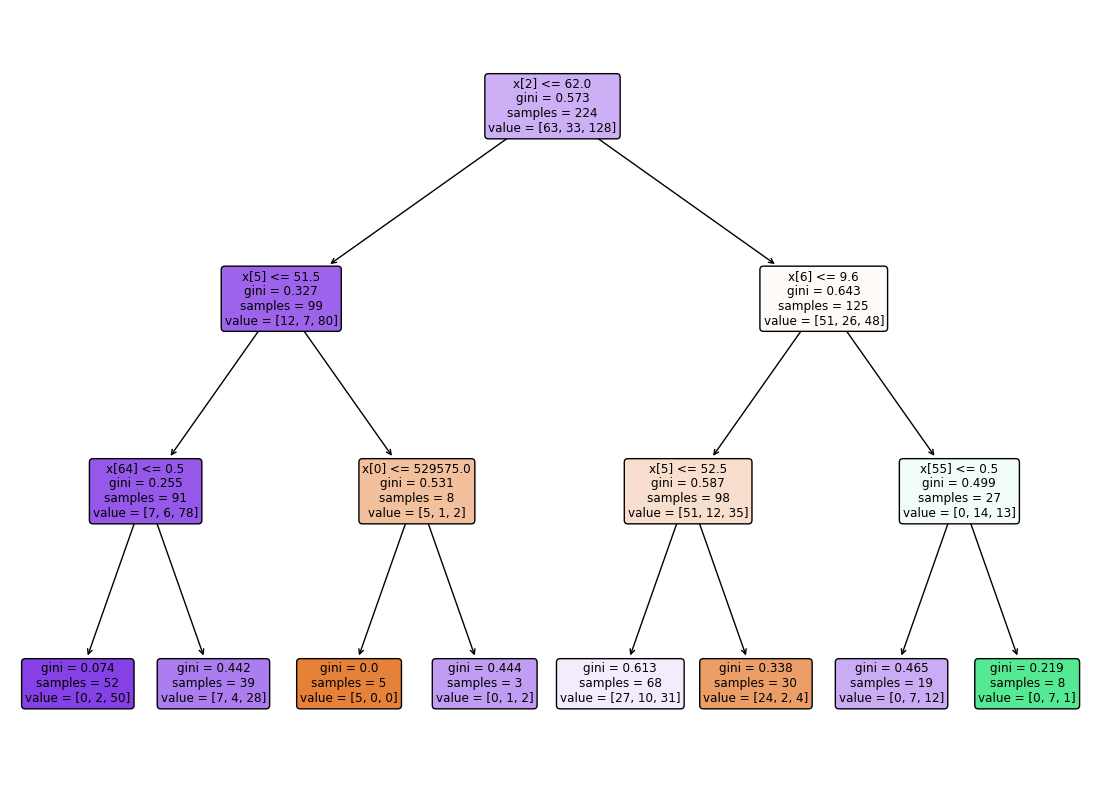

In [149]:
plt.figure(figsize=(14,10))
plot_tree(dec_tree,max_depth=3,filled=True,rounded=True);

In [150]:
from sklearn import tree

In [152]:
print(tree.export_text(dec_tree))

|--- feature_2 <= 62.00
|   |--- feature_5 <= 51.50
|   |   |--- feature_64 <= 0.50
|   |   |   |--- class: lived
|   |   |--- feature_64 >  0.50
|   |   |   |--- class: lived
|   |--- feature_5 >  51.50
|   |   |--- feature_0 <= 529575.00
|   |   |   |--- class: died
|   |   |--- feature_0 >  529575.00
|   |   |   |--- class: lived
|--- feature_2 >  62.00
|   |--- feature_6 <= 9.60
|   |   |--- feature_5 <= 52.50
|   |   |   |--- class: lived
|   |   |--- feature_5 >  52.50
|   |   |   |--- class: died
|   |--- feature_6 >  9.60
|   |   |--- feature_55 <= 0.50
|   |   |   |--- class: lived
|   |   |--- feature_55 >  0.50
|   |   |   |--- class: euthanized

